# **1. Mengimport Dataset dari GDRIVE dan Library**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
path = "/content/gdrive/MyDrive/praktikum/Praktikum 05"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [4]:
df = pd.read_csv( path + '/Data/Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.isnull().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


In [7]:
df.duplicated().sum()

np.int64(0)

# **2. Split data menjadi 80% training dan 20% testing**

In [10]:
X = df.drop(columns=['Id', 'Species'])
y = df['Species']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **3. Membuat DecisionTree**

In [14]:
#DescisionTree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

# **4. Evaluasi Model**

In [15]:
# Evaluasi
y_pred = dt.predict(X_test)
print("Akurasi Model: ", round(accuracy_score(y_test, y_pred) * 100, 2), "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi Model:  100.0 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



# **5. Visualisasi DescisionTree**

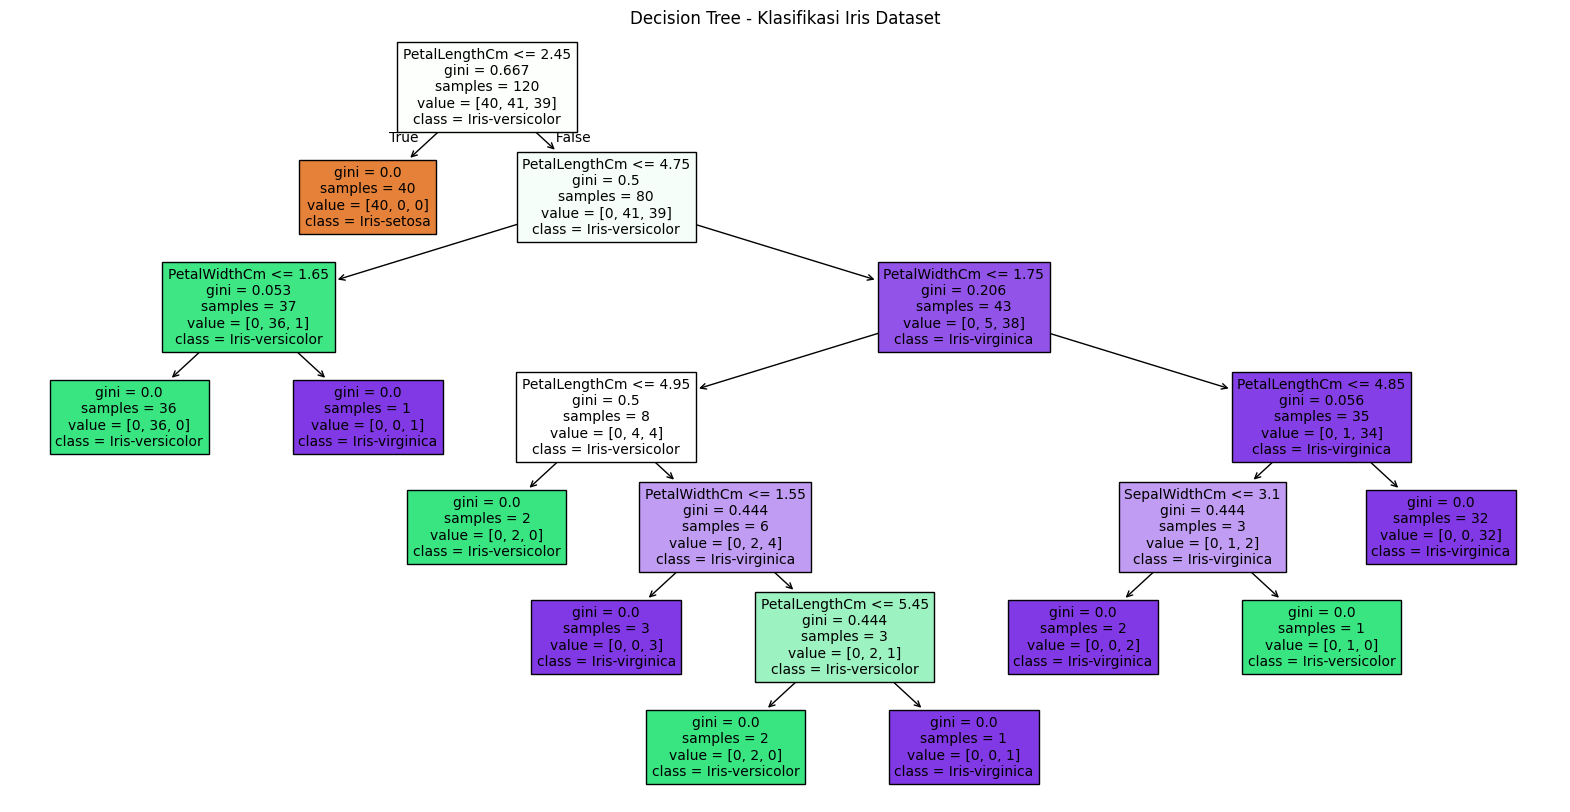

In [16]:
# Visualisasi
plt.figure(figsize=(20, 10))
plot_tree(
    dt,
    feature_names=X.columns,
    class_names=df['Species'].unique(),
    filled=True,
    fontsize=10
)
plt.title("Decision Tree - Klasifikasi Iris Dataset")
plt.show()

# **6. Menguji testing model**

In [17]:
# Prediksi menggunakan data testing
y_pred_test = dt.predict(X_test)

# Tampilkan beberapa hasil prediksi dibanding label asli
hasil = pd.DataFrame({'Asli': y_test, 'Prediksi': y_pred_test})
print("=== Hasil Prediksi Dataset Testing ===")
print(hasil.head(10))

# Evaluasi akurasi pada data testing
akurasi_test = accuracy_score(y_test, y_pred_test)
print("\nAkurasi pada Data Testing:", round(akurasi_test * 100, 2), "%")

# Tampilkan confusion matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))

=== Hasil Prediksi Dataset Testing ===
                Asli         Prediksi
73   Iris-versicolor  Iris-versicolor
18       Iris-setosa      Iris-setosa
118   Iris-virginica   Iris-virginica
78   Iris-versicolor  Iris-versicolor
76   Iris-versicolor  Iris-versicolor
31       Iris-setosa      Iris-setosa
64   Iris-versicolor  Iris-versicolor
141   Iris-virginica   Iris-virginica
68   Iris-versicolor  Iris-versicolor
82   Iris-versicolor  Iris-versicolor

Akurasi pada Data Testing: 100.0 %

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

